### Bag of n - grams


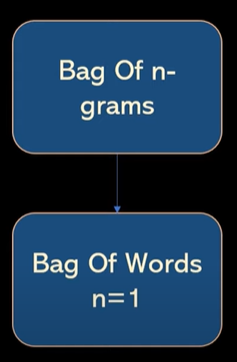


* A bag-of-n-grams model is a common representation used in natural language processing (NLP) and text mining. It's a simplifying approach where a document (or a piece of text) is represented as an unordered set of its n-grams, without considering the order of words but only their occurrence.




* An n-gram is a contiguous sequence of n items from a given sample of text or speech. For example:

* Unigram (1-gram): "bag", "of", "n", "grams"
* Bigram (2-gram): "bag of", "of n", "n grams"
* Trigram (3-gram): "bag of n", "of n grams"

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
# 'n' value is 2
v=CountVectorizer(ngram_range=(2,2))
v.fit(["Thor Hathodawala is looking for ajob"])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for ajob': 0}

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
# 'n' value is 3
v=CountVectorizer(ngram_range=(3,3))
v.fit(["Thor Hathodawala is looking for ajob"])
v.vocabulary_

{'thor hathodawala is': 3,
 'hathodawala is looking': 0,
 'is looking for': 1,
 'looking for ajob': 2}

In [3]:
#biagram
from sklearn.feature_extraction.text import CountVectorizer
# 'n' value is 3
v=CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for ajob"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 3,
 'is': 5,
 'looking': 7,
 'for': 1,
 'ajob': 0,
 'thor hathodawala': 10,
 'hathodawala is': 4,
 'is looking': 6,
 'looking for': 8,
 'for ajob': 2}

In [4]:
#triagram
from sklearn.feature_extraction.text import CountVectorizer
# 'n' value is 3
v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for ajob"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 3,
 'is': 6,
 'looking': 9,
 'for': 1,
 'ajob': 0,
 'thor hathodawala': 13,
 'hathodawala is': 4,
 'is looking': 7,
 'looking for': 10,
 'for ajob': 2,
 'thor hathodawala is': 14,
 'hathodawala is looking': 5,
 'is looking for': 8,
 'looking for ajob': 11}

In [5]:
corpus=[
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [6]:
import spacy 

#load english language model and create nlp object from it 
nlp=spacy.load("en_core_web_sm")

def preprocess(text):
    doc=nlp(text)
    
    filtered_tokens=[]
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)

preprocess("Loki is eating pizza")

'Loki eat pizza'

In [7]:
corpus

['Thor ate pizza', 'Loki is tall', 'Loki is eating pizza']

In [8]:
corpus_processed=[preprocess(text) for text in corpus]

In [9]:
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [10]:
#n-grams
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [11]:
# convert sentence into vector
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [12]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

#### News Category Classification Problem 


In [13]:
import pandas as pd

In [14]:
#importing dataset 
df=pd.read_json("C:/Users/Damodhara/Desktop/DSMP Dataset/news_dataset.json")

In [15]:
print(df.shape)
df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [16]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

* The above dataset is not balanced and we will make it as balanced.

In [17]:
min_samples=1381
df_business=df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports=df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime=df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science=df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [18]:
df_balanced=pd.concat([df_business, df_sports, df_crime, df_science], axis=0)

In [19]:
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [20]:
df_balanced['category_num'] = df_balanced.category.map({
    
    
    "BUSINESS":0,
    "SPORTS":1,
    "CRIME":2,
    "SCIENCE":3
})

In [21]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    df_balanced.text, 
                                    df_balanced.category_num,
                                    test_size=0.2, 
                                    random_state=2022, 
                                    stratify=df_balanced.category_num
                                    )

In [23]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [24]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [25]:
#Bag of word model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report 

In [26]:
clf=Pipeline([
    ("vectorizer_bow", CountVectorizer()),
    ("Multi NB", MultinomialNB())
])

In [27]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



#### Applying Bag of n-grams

In [28]:
clf=Pipeline([
    ("vectorizer_bow", CountVectorizer(ngram_range=(1,2))),
    ("Multi NB", MultinomialNB())
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [29]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [30]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

### Preprocessing

In [31]:
df_balanced["preprocessed_txt"] = df_balanced.text.apply(preprocess)

In [32]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...
